In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray
# root = '/tigress/cw55/work/2022_radi_nn/NN_AM4'
# path.insert(1,  root)
# path.insert(1,  root+'/work')
# # import work.lw_csaf_Li5Relu_EN.train_script01 as lwcsafen
# import lw_csaf_Li5Relu_EY.train_script01 as lwcsafey 
# # import work.lw_af_Li5Relu_EN.train_script01 as lwafen
# import lw_af_Li5Relu_EY.train_script01 as lwafey 

In [3]:
plt.rcParams['font.size'] = '6'

#  import data

In [4]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
year_list = np.arange(2000,2005)
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list]) 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc' for year in year_list])  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

In [5]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
year_list = np.arange(2000,2005)
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list]) 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc' for year in year_list])  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

In [6]:
def plot_ds12_diff(ds_list,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i].mean('time').load()
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'GM: {global_mean_xarray(da).values:4.2f}') 
    ax=axs[2]
    da = (ds_list[1].mean('time')-ds_list[0].mean('time')).load()
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
    fig.tight_layout()  
def plot_zonal_ta_diff(ds_list,level = np.arange(200,320,10), dlevel = np.arange(-1,1.1,0.1)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i].mean(['time','lon']).load()
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0]).mean(['time','lon']).load()
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

# plot results

## temp sturcture

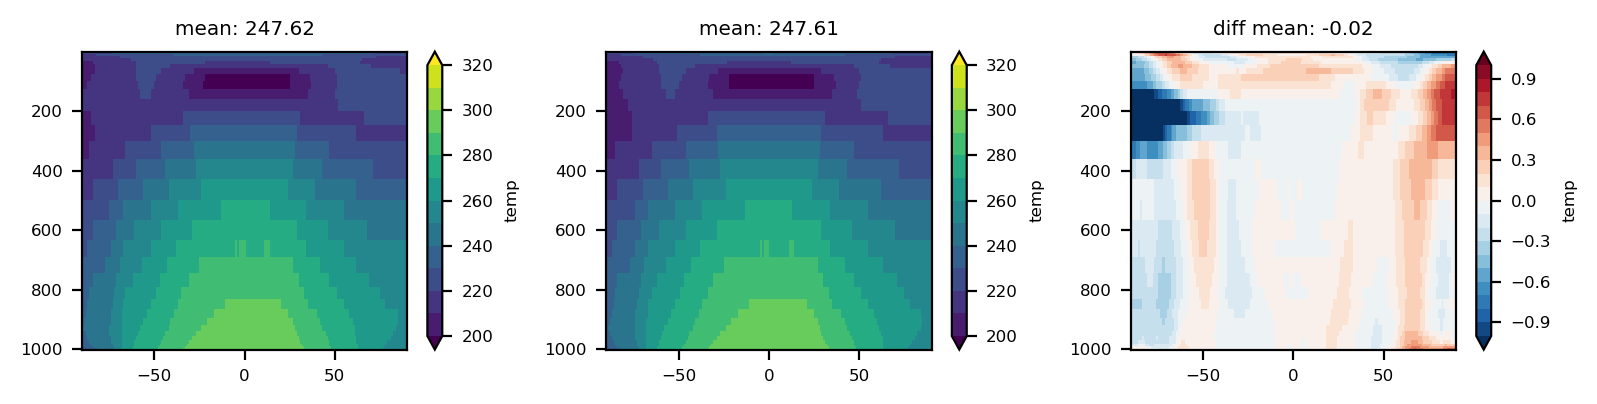

In [7]:
var = 'temp'
ds_list = [ds_ba[var],ds_nn[var]]
plot_zonal_ta_diff(ds_list,level = np.arange(200,330,10), dlevel = np.arange(-1,1.1,0.1)) 

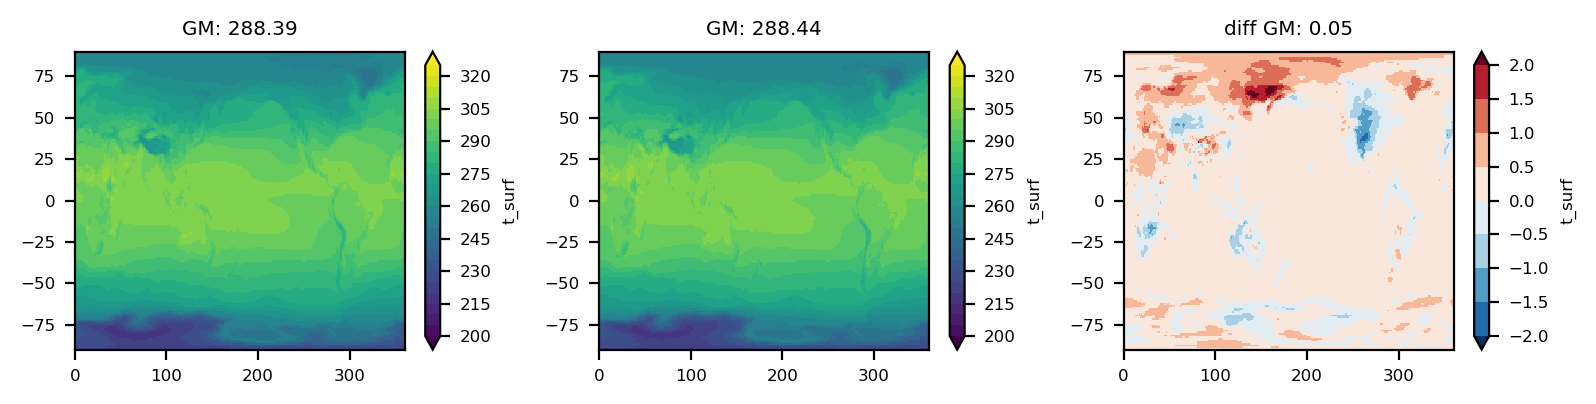

In [8]:
var = 't_surf'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(200,330,5), dlevel = np.arange(-2,2.1,0.5)) 

## lw

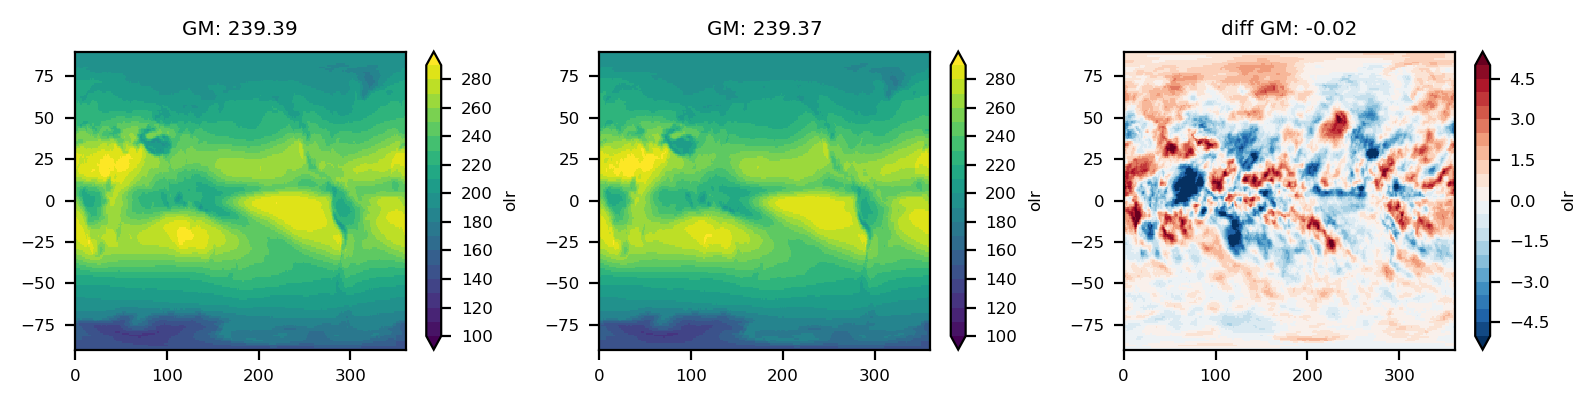

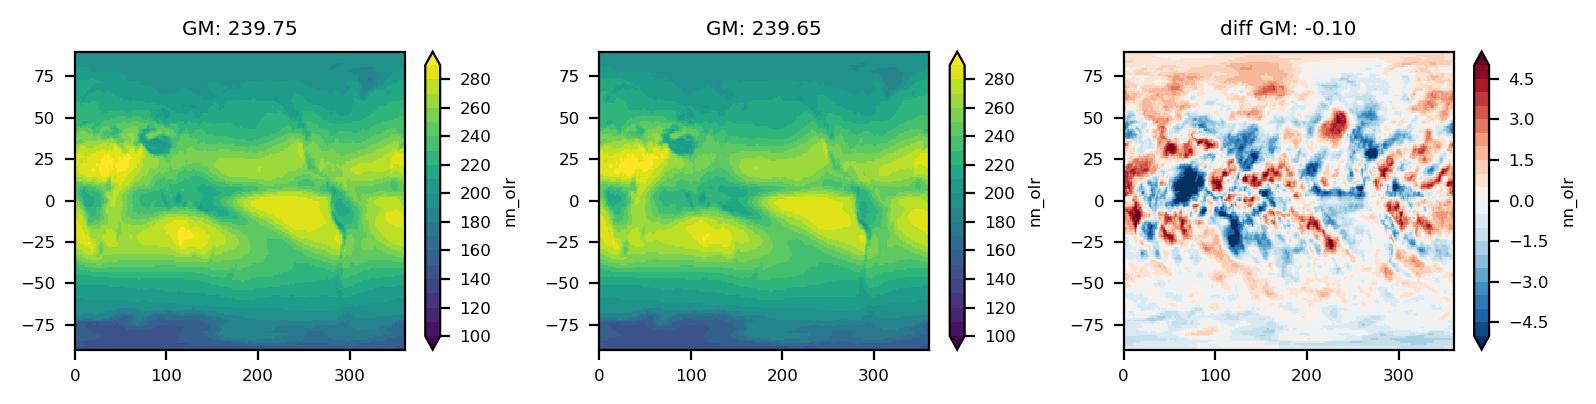

In [10]:
var = 'olr'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-5,5.1,0.5)) 
var = 'nn_olr'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-5,5.1,0.5)) 

# swup

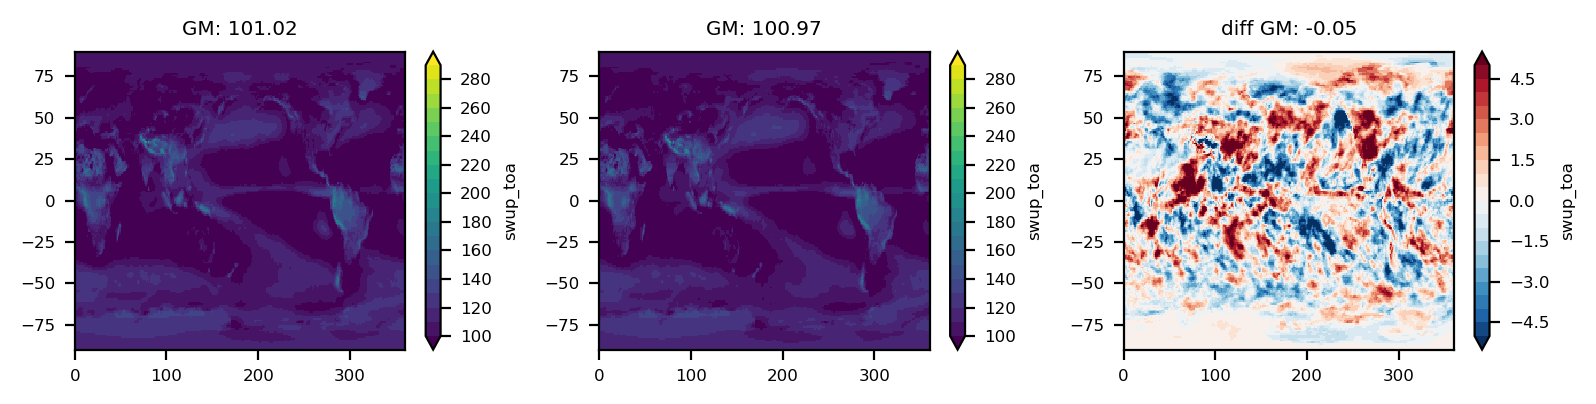

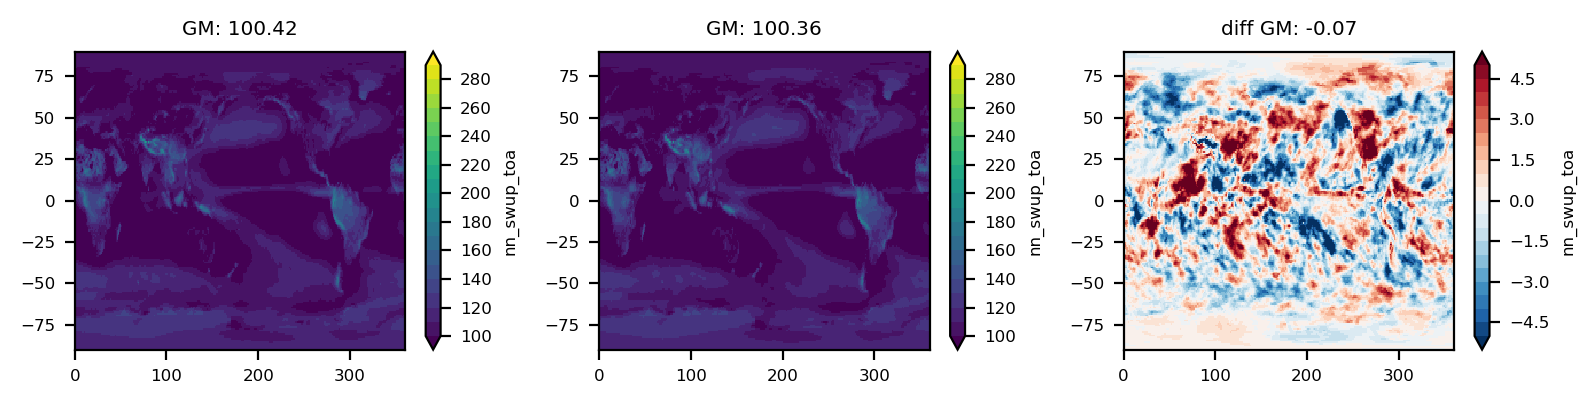

In [11]:
var = 'swup_toa'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-5,5.1,0.5)) 
var = 'nn_swup_toa'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-5,5.1,0.5)) 

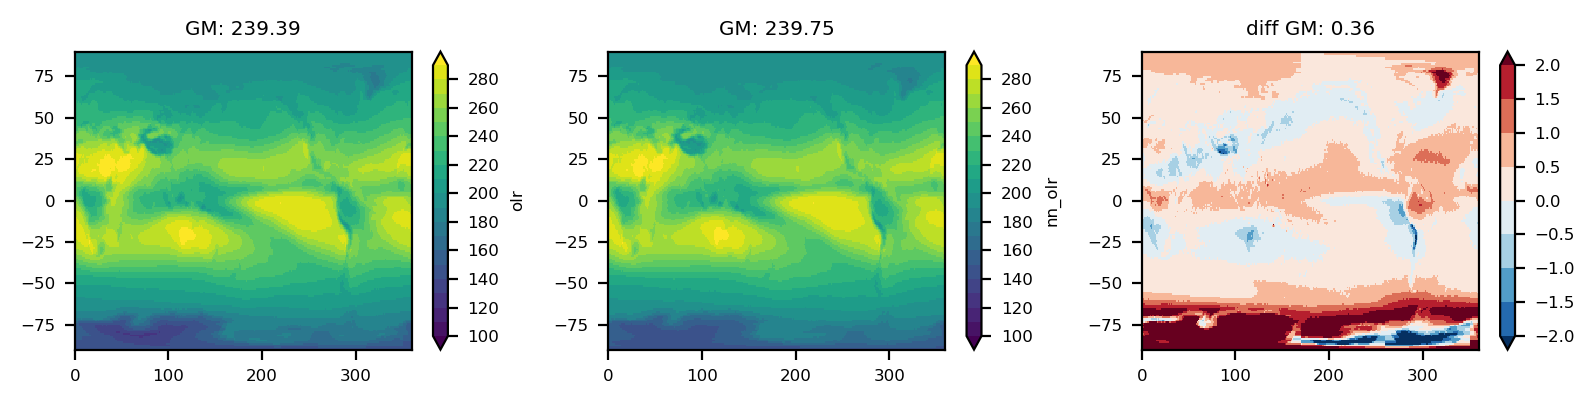

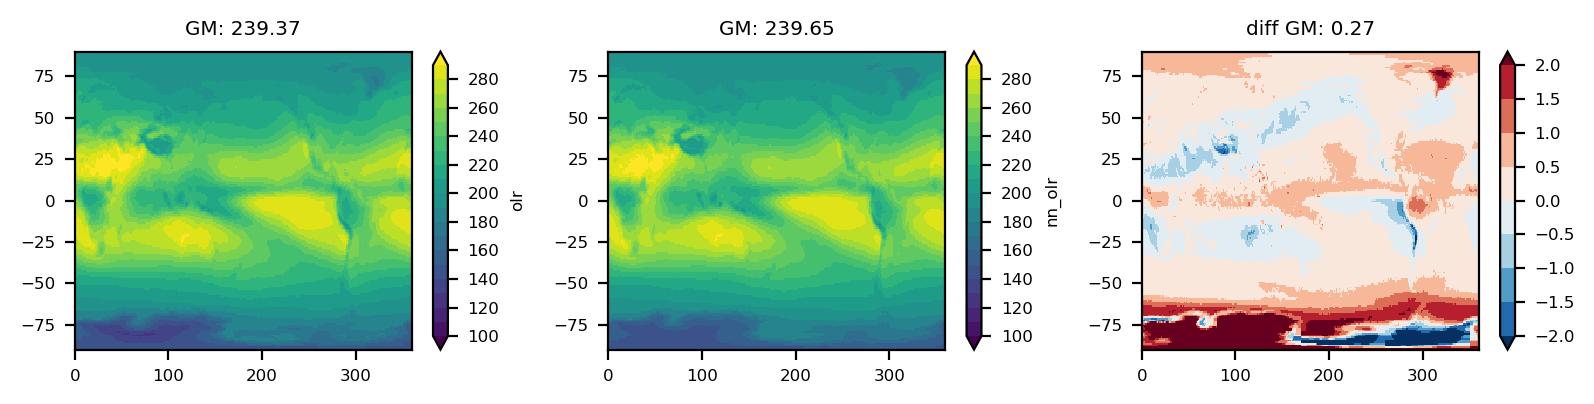

In [12]:
ds_list = [ds_ba['olr'],ds_ba['nn_olr']]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn['olr'],ds_nn['nn_olr']]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

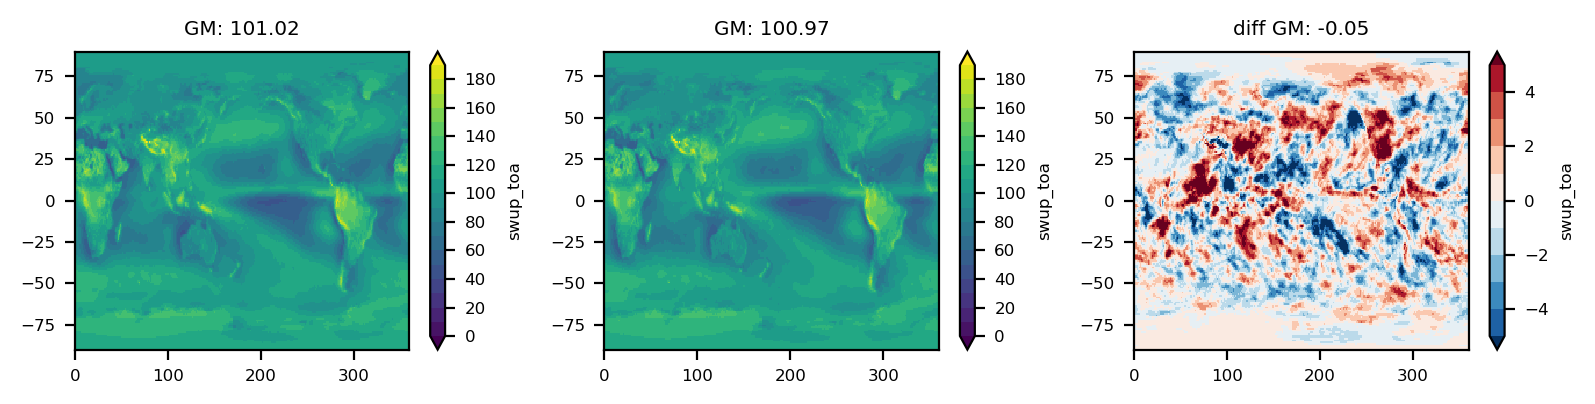

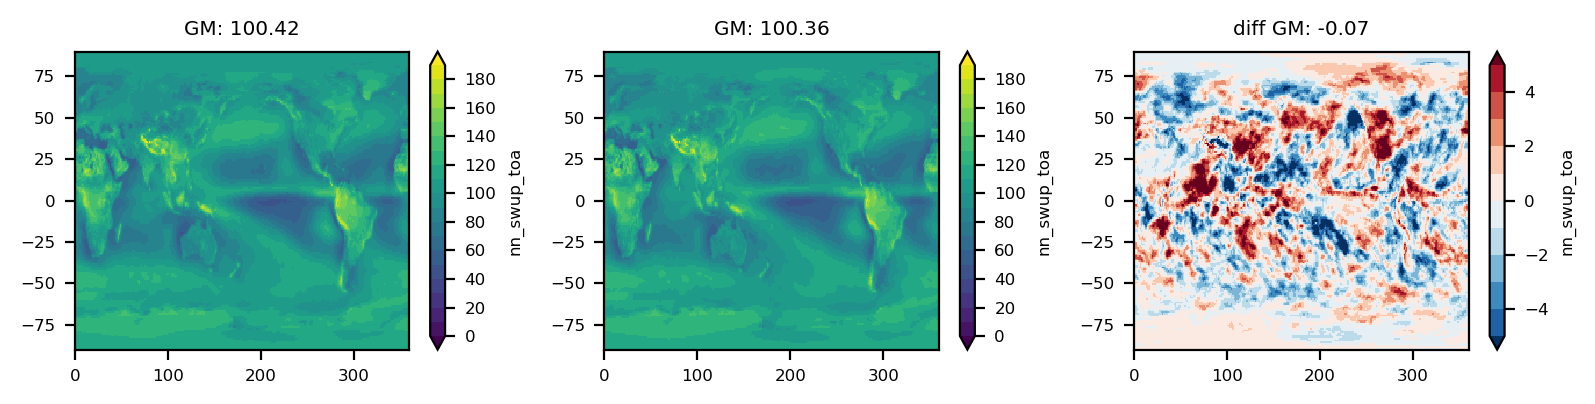

In [13]:
var = 'swup_toa'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-5,5.1,1)) 
var = 'nn_swup_toa'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-5,5.1,1)) 

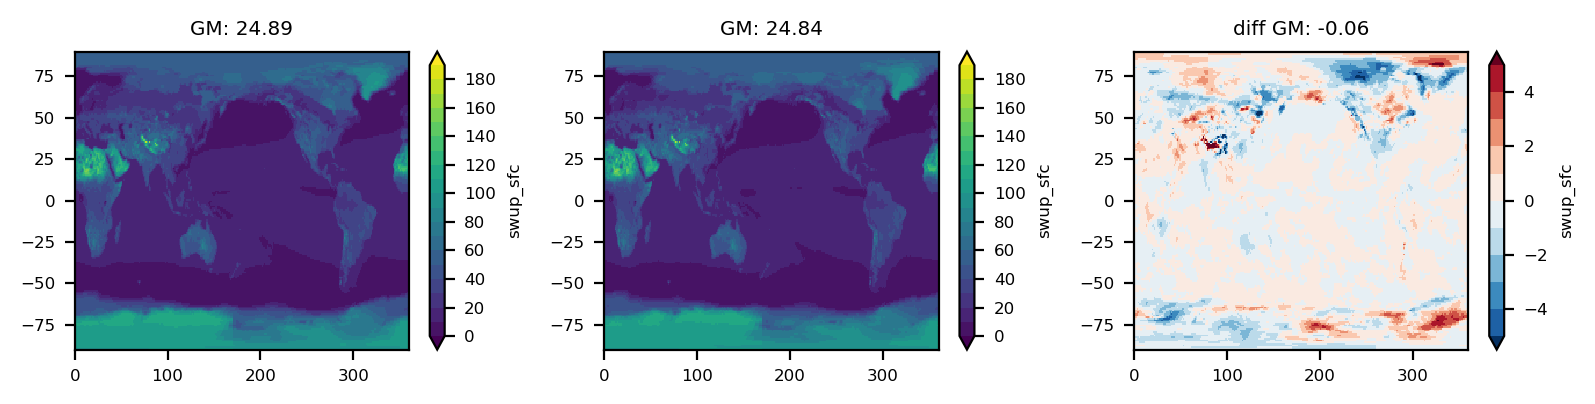

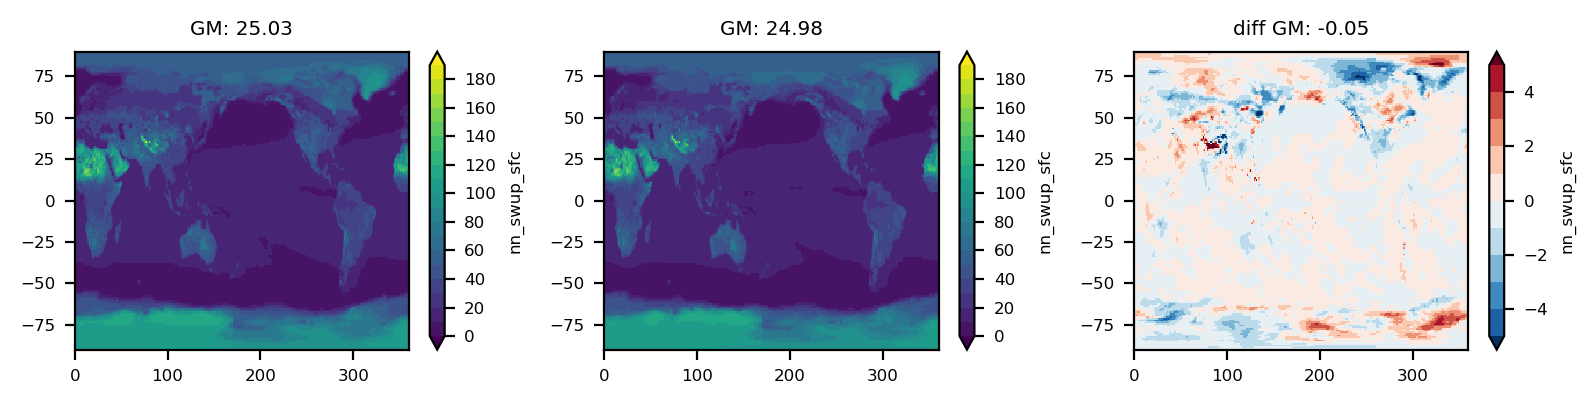

In [14]:
var = 'swup_sfc'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-5,5.1,1)) 
var = 'nn_swup_sfc'
ds_list = [ds_ba[var],ds_nn[var]]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-5,5.1,1)) 

# nn ratio

In [4]:
file_path1 = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
file_path2 = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
year_list = np.arange(2000,2005)

nn_ratio = np.zeros((2,7,len(year_list)))

for fi, fp in enumerate([file_path1, file_path2]):
    for yi, year in enumerate(year_list):
        print(year, end=' ')
        for ti in range(1,7):
            ds = xr.open_dataset(fp+f'/HISTORY/{year}0101.atmos_8xdaily.tile{ti}.nc')    
            data = ds['nn_lwup_sfc'].values
            tmp = np.where(data<40, 1, 0 )
            tmp = np.sum(tmp)
            # print(tmp, data.size, f'{tmp/data.size*100:5.2f}%')
            nn_ratio[fi,ti-1,yi] = tmp/data.size*100
        ds = xr.open_dataset(fp+f'/POSTP/{year}0101.atmos_8xdaily.nc')  
        data = ds['nn_lwup_sfc'].values
        tmp = np.where(data<40, 1, 0 )
        tmp = np.sum(tmp)
        nn_ratio[fi,6,yi] = tmp/data.size*100
        # print(tmp, data.size, f'{tmp/data.size*100:5.2f}%')

2000 2001 2002 2003 2004 2000 2001 2002 2003 2004 

In [12]:
import matplotlib.ticker as mtick

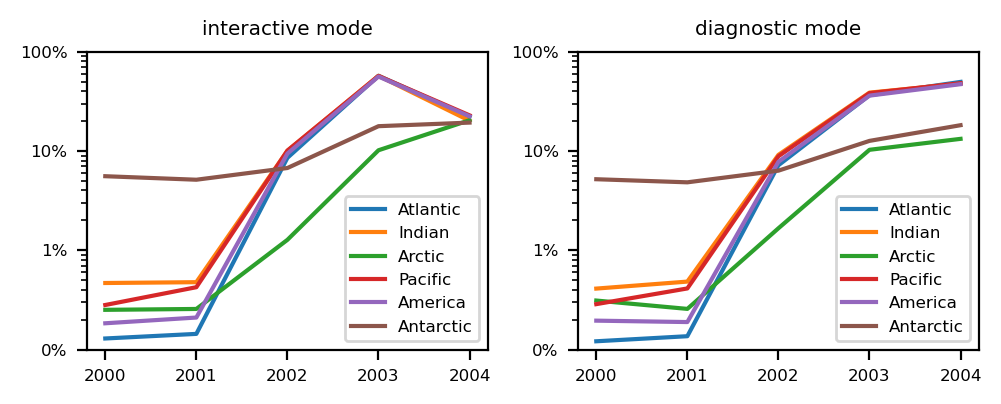

In [13]:
tile_name = ['Atlantic', 'Indian','Arctic', 'Pacific', 'America', 'Antarctic']
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=200)
for ti in range(6):
    axs[0].plot(year_list,nn_ratio[0,ti,:],label=tile_name[ti])
    axs[1].plot(year_list,nn_ratio[1,ti,:],label=tile_name[ti])

# axs[0].plot(year_list,nn_ratio[0,6,:]*100,label='latlon')
# axs[1].plot(year_list,nn_ratio[1,6,:]*100,label='latlon')
# t_gm = global_mean_xarray(ds_ba.t_surf.groupby('time.year').mean('time'))
# ax  = axs[0].twinx()
# ax.plot(year_list,t_gm,c='black') 
for ax in axs:
    ax.legend()
    ax.set_yscale('log') 
    ax.set_ylim([0.1,100]) 
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_title('interactive mode')
axs[1].set_title('diagnostic mode')
fig.tight_layout()  

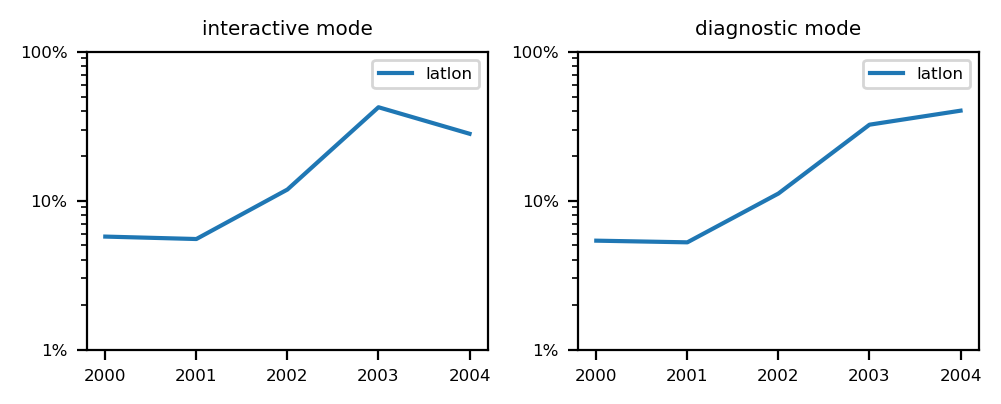

In [14]:
tile_name = ['Atlantic', 'Indian','Arctic', 'Pacific', 'America', 'Antarctic']
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=200)
# for ti in range(6):
#     axs[0].plot(year_list,nn_ratio[0,ti,:]*100,label=tile_name[ti])
#     axs[1].plot(year_list,nn_ratio[1,ti,:]*100,label=tile_name[ti])

axs[0].plot(year_list,nn_ratio[0,6,:],label='latlon')
axs[1].plot(year_list,nn_ratio[1,6,:],label='latlon')
for ax in axs:
    ax.legend()
    ax.set_yscale('log') 
    ax.set_ylim([1,100]) 
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_title('interactive mode')
axs[1].set_title('diagnostic mode')
fig.tight_layout()  

In [7]:
# tile_name = ['Atlantic', 'Indian','Arctic', 'Pacific', 'America', 'Antarctic']

# for ti in range(1,7):
#     fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=200)
#     ds = xr.open_dataset(fp+f'/HISTORY/{year}0101.atmos_8xdaily.tile{ti}.nc')
    # ds.t_surf[0].plot()